### Step 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
# Include section
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
# To output all the images inside jupyter
%matplotlib inline 

In [2]:
# Load calibration images(chess boards in different angles from our camera_cal folder)
def readChessImages():
    imagePath = './camera_cal/c*.jpg'
    calibrationImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob(imagePath)))
    return calibrationImages

# Method for displaying the images
def showImages(calibrationImages):
    for img in calibrationImages:
        cv2.imshow(str(img[0]),img[1])
        cv2.waitKey(0)

In [3]:
# Method for detecting the points in chess images (objpoints and imgpoints)
def findingPoints(calibrationImages):
    objpoints = []
    imgpoints = []
    outimages = []
    originalImages = []

    objp = np.zeros((6*9,3), np.float32) 
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y cordinates.

    for imageAndFile in calibrationImages:
        fileName, image = imageAndFile
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            img_points = cv2.drawChessboardCorners(image.copy(), (9,6), corners, ret)
            outimages.append(img_points)
            originalImages.append(image)
   
    return objpoints, imgpoints, originalImages, outimages

# Method for returning camera matrix, mtx, and the distortion coefficients dist 
def getCoefficients(objpoints, imgpoints, originalImage):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, originalImage.shape[0:2], None, None)
    return mtx, dist

# Method for saving camera matrix, mtx, and the distortion coefficients dist into Pickle file
def saveCoefficientsIntoPickleFile(mtx, dist,fileDestination):
    pickle.dump({ 'mtx': mtx, 'dist': dist }, open(fileDestination, 'wb'))
    
    
def showUndistortImage(original, mtx, dist):
    undist = cv2.undistort(original, mtx, dist, None, mtx)
    fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
    axes[0].imshow(original)
    axes[0].set_title('Original Image')
    axes[1].imshow(undist)
    axes[1].set_title('Undistort of the original Image')

Showing original image --> undistort result we got of the image


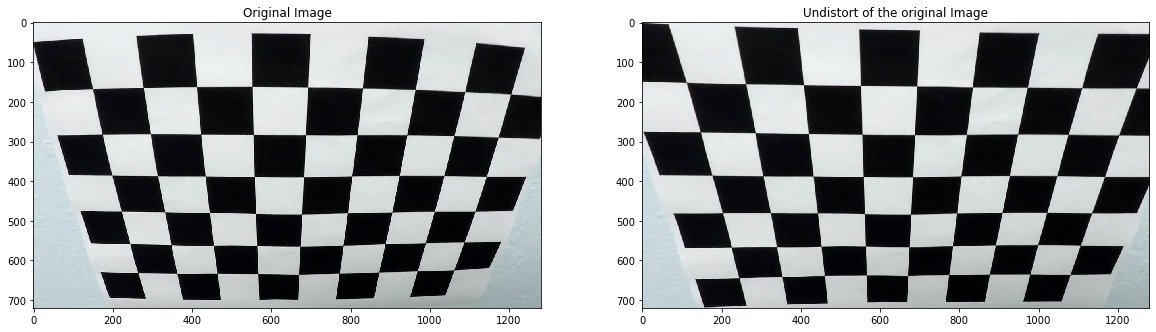

In [4]:
# Read images
calibrationImages = readChessImages()
# Return object points and image points
objpoints, imgpoints, originalImages, outimages = findingPoints(calibrationImages)
# Save coefficients into pickle
originalImage = originalImages[10]


#Getting the coefficients we need for camera calibration
mtx,dist = getCoefficients(objpoints, imgpoints, originalImage)

saveCoefficientsIntoPickleFile(mtx, dist, './pickled_data/camera_calibration.p')

# Print mtx, and dist
# print("Camera matrix: ", mtx)
# print("Distortion coefficient: ", dist)

print("Showing original image --> undistort result we got of the image")
showUndistortImage(originalImage, mtx,dist)

Showing original image --> undistort result we got of the image


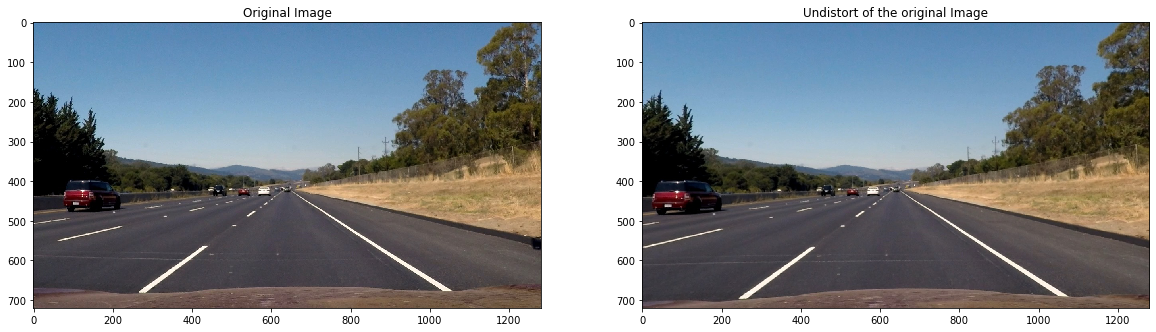

In [11]:
print("Showing original image --> undistort result we got of the image")
imagePath = './test_images/straight_lines2.jpg'
gray = cv2.cvtColor(cv2.imread(imagePath), cv2.COLOR_BGR2RGB)
showUndistortImage(gray, mtx, dist)